In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets , svm , metrics , tree , naive_bayes
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

ds = datasets.load_digits()

# MNIST Digit Classification Problem using MLP Classifier

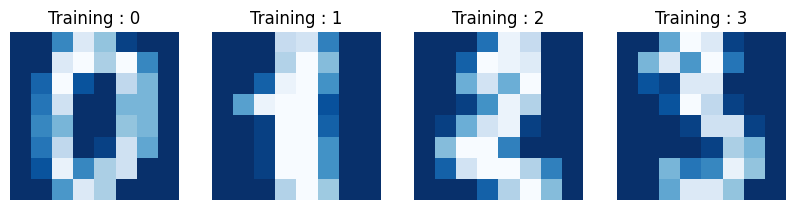

In [3]:
_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,4))
for axis,image,label in zip(axes,ds.images,ds.target):
  axis.set_axis_off()
  axis.imshow(image,cmap="Blues_r")
  axis.set_title("Training : {}".format(label))

Classification report for classifier MLPClassifier(hidden_layer_sizes=200):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      0.97      0.99        35
           2       1.00      1.00      1.00        37
           3       0.97      1.00      0.99        35
           4       0.98      1.00      0.99        49
           5       1.00      0.91      0.96        35
           6       0.97      1.00      0.99        36
           7       1.00      1.00      1.00        36
           8       0.94      1.00      0.97        29
           9       0.97      0.97      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360






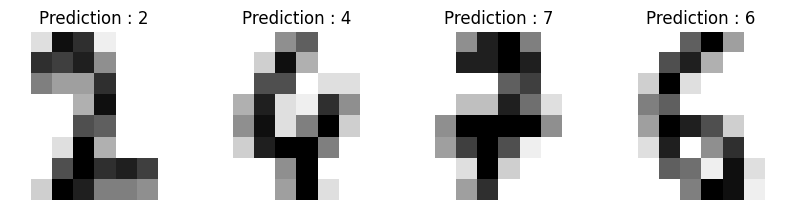

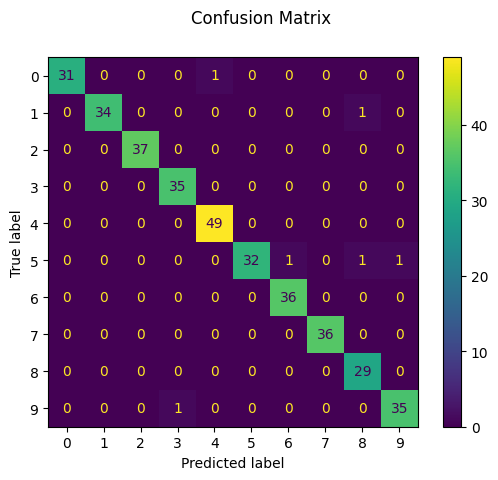

In [21]:
n_samples = len(ds.images)
data = ds.images.reshape(n_samples,-1)
model = MLPClassifier(hidden_layer_sizes=(200))
X_train,X_test,Y_train,Y_test = train_test_split(data,ds.target,test_size=0.2,shuffle=True)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,4))
for axis,image,label in zip(axes,X_test,y_pred):
  axis.set_axis_off()
  image = image.reshape(8,8)
  axis.imshow(image,cmap=plt.cm.gray_r)
  axis.set_title("Prediction : {}".format(label))

print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(Y_test, y_pred)}\n"
)

print("\n")
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

# Iris Type Clustering Problem using KMeans

Iris Type : 3; Flower Samples : 150; Flower Features : 4


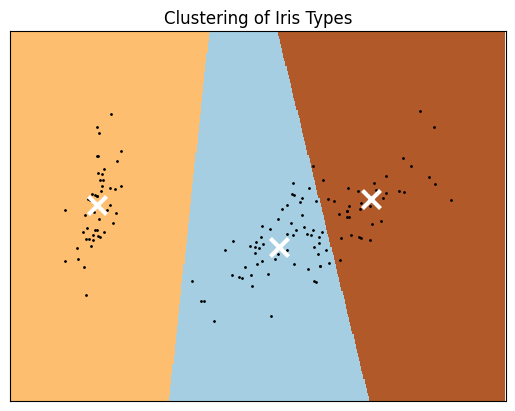

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data,labels = datasets.load_iris(return_X_y=True)
(n_samples,n_features),n_classes = data.shape , np.unique(labels).size
print(f"Iris Type : {n_classes}; Flower Samples : {n_samples}; Flower Features : {n_features}")

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++",n_clusters=n_classes,n_init=4)
kmeans.fit(reduced_data)

h = 0.02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "Clustering of Iris Types"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()